In [2]:
import pandas as pd


In [3]:

file_path = "E2.csv"

data = pd.read_csv(file_path)


print(data.head())


  Div        Date   Time      HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E2  09/08/2024  20:00      Barnsley    Mansfield     1     2   A     1   
1  E2  10/08/2024  17:30    Birmingham      Reading     1     1   D     0   
2  E2  10/08/2024  17:30   Bristol Rvs  Northampton     1     0   H     0   
3  E2  10/08/2024  17:30        Burton      Lincoln     2     3   A     2   
4  E2  10/08/2024  17:30  Crawley Town    Blackpool     2     1   H     2   

   HTAG  ... B365CAHH B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  \
0     2  ...     2.03     1.83   2.02   1.87     2.05     2.00     1.95   
1     1  ...     1.80     2.05   1.81   2.10     1.83     2.10     1.80   
2     0  ...     1.98     1.88   1.98   1.91     1.98     1.92     1.93   
3     2  ...     1.80     2.05   1.82   2.08     1.88     2.09     1.80   
4     0  ...     1.83     2.03   1.85   2.04     1.86     2.05     1.82   

   AvgCAHA  BFECAHH  BFECAHA  
0     1.85     2.06     1.93  
1     2.01     1.82     

In [4]:
outcome_counts = data['FTR'].value_counts()
total_matches = len(data)
outcome_percentages = (outcome_counts / total_matches) * 100

print("Match Outcome Distribution:")
print(outcome_counts)
print("Outcome Percentages (%):")
print(outcome_percentages)

Match Outcome Distribution:
FTR
H    86
A    56
D    44
Name: count, dtype: int64
Outcome Percentages (%):
FTR
H    46.236559
A    30.107527
D    23.655914
Name: count, dtype: float64


In [5]:
home_wins = data[data['FTR'] == 'H']
away_wins = data[data['FTR'] == 'A']
draws = data[data['FTR'] == 'D']


avg_home_odds = home_wins['B365H'].mean()
avg_away_odds = away_wins['B365A'].mean()
avg_draw_odds = draws['B365D'].mean() 

print("\nAverage Odds for Each Outcome:")
print(f"Home Win: {avg_home_odds:.2f}")
print(f"Away Win: {avg_away_odds:.2f}")
print(f"Draw: {avg_draw_odds:.2f}")


Average Odds for Each Outcome:
Home Win: 2.19
Away Win: 2.94
Draw: 3.61


In [6]:
home_upsets = home_wins[home_wins['B365H'] > 3.0]
away_upsets = away_wins[away_wins['B365A'] > 3.0]

upset_count = len(home_upsets) + len(away_upsets)
upset_percentage = (upset_count / total_matches) * 100

print(f"\nNumber of Upsets (Odds > 3.0): {upset_count}")
print(f"Upset Percentage: {upset_percentage:.2f}%")


Number of Upsets (Odds > 3.0): 29
Upset Percentage: 15.59%


In [7]:
upsets = pd.concat([
    home_upsets[['HomeTeam', 'AwayTeam', 'B365H', 'FTR', 'Date']], 
    away_upsets[['HomeTeam', 'AwayTeam', 'B365A', 'FTR', 'Date']]
])



# Add a column for odds, which will be the home odds if it's a home upset, or away odds if it's an away upset
upsets['Odds'] = upsets['B365H'].fillna(upsets['B365A'])

# Add a column to indicate if the odds are for home or away
upsets['OddsType'] = upsets.apply(
    lambda row: 'Home Odds' if pd.notna(row['B365H']) else 'Away Odds', axis=1
)

# Sort the upsets by the odds in descending order
upsets_sorted = upsets.sort_values(by='Odds', ascending=False)

# Select the top 5 upsets
top_5_upsets = upsets_sorted.head(5)

# Display the top 5 upsets
print("\nTop 5 Biggest Upsets (Odds > 3.0):")
for index, row in top_5_upsets.iterrows():
    print(f"Date: {row['Date']}, Home Team: {row['HomeTeam']}, Away Team: {row['AwayTeam']}, "
          f"{row['OddsType']}: {row['Odds']:.2f}, Full-Time Result: {row['FTR']}")


Top 5 Biggest Upsets (Odds > 3.0):
Date: 21/09/2024, Home Team: Huddersfield, Away Team: Northampton, Away Odds: 8.00, Full-Time Result: A
Date: 23/11/2024, Home Team: Shrewsbury, Away Team: Birmingham, Home Odds: 7.50, Full-Time Result: H
Date: 31/08/2024, Home Team: Bolton, Away Team: Exeter, Away Odds: 6.50, Full-Time Result: A
Date: 21/09/2024, Home Team: Stockport, Away Team: Leyton Orient, Away Odds: 6.00, Full-Time Result: A
Date: 22/10/2024, Home Team: Stevenage, Away Team: Cambridge, Away Odds: 5.00, Full-Time Result: A


In [8]:
# Identify home upsets (home wins with odds > 3.0)
home_upsets = home_wins[home_wins['B365H'] > 3.0]

# Sort the home upsets by the home odds in descending order
home_upsets_sorted = home_upsets[['HomeTeam', 'AwayTeam', 'B365H', 'FTR', 'Date']].sort_values(by='B365H', ascending=False)

# Select the top 5 home upsets
top_5_home_upsets = home_upsets_sorted.head(5)

# Display the top 5 home upsets with clear indication of home odds
print("\nTop 5 Biggest Home Upsets (Home Team Wins with Odds > 3.0):")
for index, row in top_5_home_upsets.iterrows():
    print(f"Date: {row['Date']}, Home Team: {row['HomeTeam']}, Away Team: {row['AwayTeam']}, "
          f"Home Odds: {row['B365H']:.2f}, Full-Time Result: {row['FTR']}")



Top 5 Biggest Home Upsets (Home Team Wins with Odds > 3.0):
Date: 23/11/2024, Home Team: Shrewsbury, Away Team: Birmingham, Home Odds: 7.50, Full-Time Result: H
Date: 05/10/2024, Home Team: Charlton, Away Team: Birmingham, Home Odds: 4.00, Full-Time Result: H
Date: 23/11/2024, Home Team: Crawley Town, Away Team: Rotherham, Home Odds: 3.60, Full-Time Result: H
Date: 22/10/2024, Home Team: Crawley Town, Away Team: Lincoln, Home Odds: 3.40, Full-Time Result: H
Date: 10/08/2024, Home Team: Crawley Town, Away Team: Blackpool, Home Odds: 3.40, Full-Time Result: H


In [9]:
# Calculate favorite win percentage
data['Favorite'] = data[['B365H', 'B365D', 'B365A']].idxmin(axis=1)
data['FavoriteWon'] = ((data['Favorite'] == 'B365H') & (data['FTR'] == 'H')) | \
                      ((data['Favorite'] == 'B365A') & (data['FTR'] == 'A'))

# Calculate the percentage of matches where the favorite won
favorite_win_percentage = (data['FavoriteWon'].sum() / total_matches) * 100

# Calculate the percentage of matches that ended in a draw
draw_percentage = (data['FTR'] == 'D').sum() / total_matches * 100

# Calculate the percentage of matches where the favorite lost (i.e., favorite not winning)
favorite_loss_percentage = ((data['FavoriteWon'] == False) & (data['FTR'] != 'D')).sum() / total_matches * 100

# Display the results
print(f"\nPercentage of Matches Where the Favorite Won: {favorite_win_percentage:.2f}%")
print(f"Percentage of Matches that Were a Draw: {draw_percentage:.2f}%")
print(f"Percentage of Matches Where the Favorite Lost: {favorite_loss_percentage:.2f}%")



Percentage of Matches Where the Favorite Won: 51.61%
Percentage of Matches that Were a Draw: 23.66%
Percentage of Matches Where the Favorite Lost: 24.73%


In [10]:

# FTHG = Full Time Home Goals, FTAG = Full Time Away Goals

# Sum all home goals and away goals
total_home_goals = data['FTHG'].sum()  # Total home goals scored
total_away_goals = data['FTAG'].sum()  # Total away goals scored

# Count the number of home and away matches (rows in the data)
total_home_matches = len(data)  # Each row corresponds to a match

# Calculate average goals scored at home and away
average_home_goals = total_home_goals / total_home_matches
average_away_goals = total_away_goals / total_home_matches  # The same number of matches for away

# Output the results
print(f"Total Home Goals: {total_home_goals}")
print(f"Average Home Goals per Match: {average_home_goals:.2f}")
print(f"Total Away Goals: {total_away_goals}")
print(f"Average Away Goals per Match: {average_away_goals:.2f}")


Total Home Goals: 268
Average Home Goals per Match: 1.44
Total Away Goals: 215
Average Away Goals per Match: 1.16


In [11]:

# FTHG = Full Time Home Goals, FTAG = Full Time Away Goals

# Filter the data for Wrexham as the home team
wrexham_home = data[data['HomeTeam'] == 'Wrexham']

# Filter the data for Wrexham as the away team
wrexham_away = data[data['AwayTeam'] == 'Wrexham']

# Calculate total home goals scored by Wrexham
total_wrexham_home_goals = wrexham_home['FTHG'].sum()

# Calculate total away goals scored by Wrexham
total_wrexham_away_goals = wrexham_away['FTAG'].sum()

# Calculate the number of home matches and away matches Wrexham has played
total_wrexham_home_matches = len(wrexham_home)
total_wrexham_away_matches = len(wrexham_away)

# Calculate average home goals and away goals per match for Wrexham
average_wrexham_home_goals = total_wrexham_home_goals / total_wrexham_home_matches if total_wrexham_home_matches > 0 else 0
average_wrexham_away_goals = total_wrexham_away_goals / total_wrexham_away_matches if total_wrexham_away_matches > 0 else 0

# Output the results
print(f"Wrexham's Total Home Goals: {total_wrexham_home_goals}")
print(f"Wrexham's Average Home Goals per Match: {average_wrexham_home_goals:.2f}")
print(f"Wrexham's Total Away Goals: {total_wrexham_away_goals}")
print(f"Wrexham's Average Away Goals per Match: {average_wrexham_away_goals:.2f}")


Wrexham's Total Home Goals: 19
Wrexham's Average Home Goals per Match: 2.38
Wrexham's Total Away Goals: 6
Wrexham's Average Away Goals per Match: 0.75


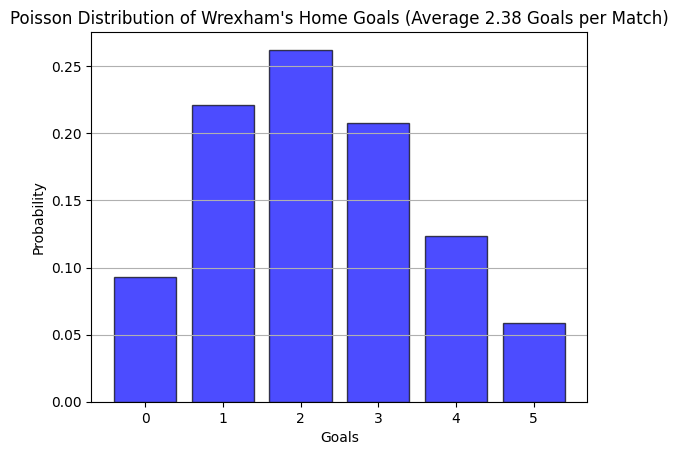

Probability of Wrexham scoring 0 goals: 0.0930
Probability of Wrexham scoring 1 goals: 0.2209
Probability of Wrexham scoring 2 goals: 0.2623
Probability of Wrexham scoring 3 goals: 0.2077
Probability of Wrexham scoring 4 goals: 0.1233
Probability of Wrexham scoring 5 goals: 0.0586


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson


# Set the range of goals to predict (e.g., from 0 to 5 goals)
goal_range = np.arange(0, 6)

# Calculate the Poisson distribution probabilities for each number of goals
poisson_probs = poisson.pmf(goal_range, average_wrexham_home_goals)

# Plot the Poisson distribution
plt.bar(goal_range, poisson_probs, alpha=0.7, color='blue', edgecolor='black')
plt.title(f"Poisson Distribution of Wrexham's Home Goals (Average {average_wrexham_home_goals:.2f} Goals per Match)")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.xticks(goal_range)
plt.grid(axis='y')
plt.show()

# Output the probabilities for each goal count
for goals, prob in zip(goal_range, poisson_probs):
    print(f"Probability of Wrexham scoring {goals} goals: {prob:.4f}")


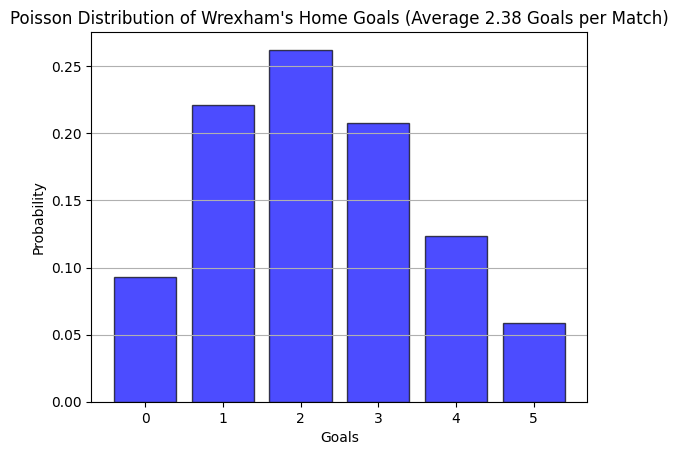

Probability of Wrexham scoring 0 goals: 0.0930
Probability of Wrexham scoring 1 goals: 0.2209
Probability of Wrexham scoring 2 goals: 0.2623
Probability of Wrexham scoring 3 goals: 0.2077
Probability of Wrexham scoring 4 goals: 0.1233
Probability of Wrexham scoring 5 goals: 0.0586


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson


# First, filter the data to get only Wrexham's home matches
wrexham_home_goals = data[data['HomeTeam'] == 'Wrexham']['FTHG']

# Calculate the average number of goals scored by Wrexham at home
average_wrexham_home_goals = wrexham_home_goals.mean()

# Set the range of goals to predict (e.g., from 0 to 5 goals)
goal_range = np.arange(0, 6)

# Calculate the Poisson distribution probabilities for each number of goals
poisson_probs = poisson.pmf(goal_range, average_wrexham_home_goals)

# Plot the Poisson distribution
plt.bar(goal_range, poisson_probs, alpha=0.7, color='blue', edgecolor='black')
plt.title(f"Poisson Distribution of Wrexham's Home Goals (Average {average_wrexham_home_goals:.2f} Goals per Match)")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.xticks(goal_range)
plt.grid(axis='y')
plt.show()

# Output the probabilities for each goal count
for goals, prob in zip(goal_range, poisson_probs):
    print(f"Probability of Wrexham scoring {goals} goals: {prob:.4f}")


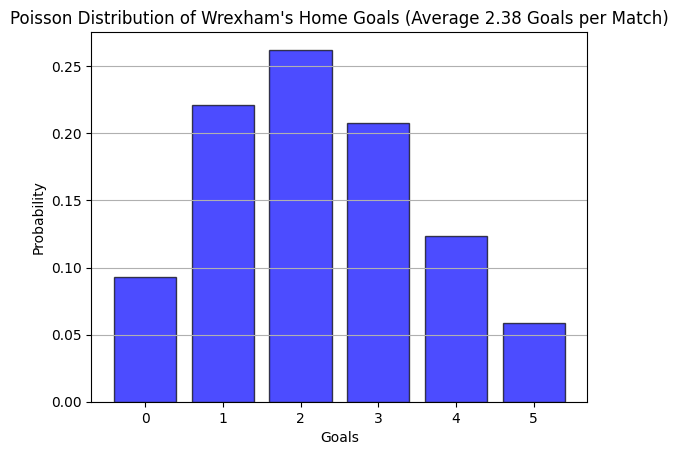

Probability of Wrexham scoring 0 goals: 0.0930
Probability of Wrexham scoring 1 goals: 0.2209
Probability of Wrexham scoring 2 goals: 0.2623
Probability of Wrexham scoring 3 goals: 0.2077
Probability of Wrexham scoring 4 goals: 0.1233
Probability of Wrexham scoring 5 goals: 0.0586


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# First, filter the data to get only Wrexham's home matches
wrexham_home_goals = data[data['HomeTeam'] == 'Wrexham']['FTHG']

# Calculate the average number of goals scored by Wrexham at home
average_wrexham_home_goals = wrexham_home_goals.mean()

# Set the range of goals to predict (e.g., from 0 to 5 goals)
goal_range = np.arange(0, 6)

# Calculate the Poisson distribution probabilities for each number of goals
poisson_probs = poisson.pmf(goal_range, average_wrexham_home_goals)

# Plot the Poisson distribution
plt.bar(goal_range, poisson_probs, alpha=0.7, color='blue', edgecolor='black')
plt.title(f"Poisson Distribution of Wrexham's Home Goals (Average {average_wrexham_home_goals:.2f} Goals per Match)")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.xticks(goal_range)
plt.grid(axis='y')
plt.show()

# Output the probabilities for each goal count
for goals, prob in zip(goal_range, poisson_probs):
    print(f"Probability of Wrexham scoring {goals} goals: {prob:.4f}")


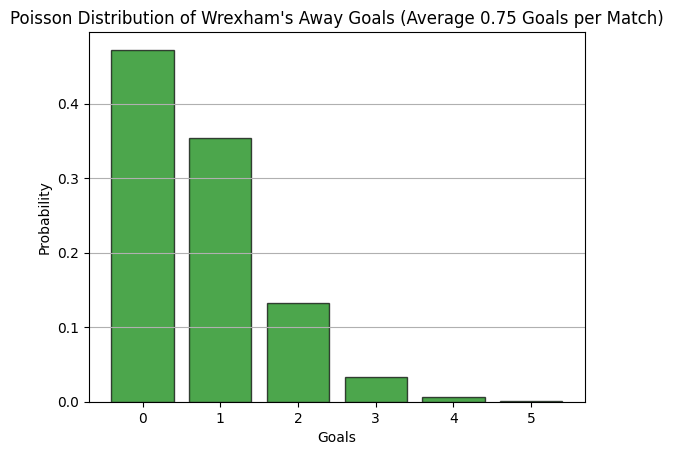

Probability of Wrexham scoring 0 away goals: 0.4724
Probability of Wrexham scoring 1 away goals: 0.3543
Probability of Wrexham scoring 2 away goals: 0.1329
Probability of Wrexham scoring 3 away goals: 0.0332
Probability of Wrexham scoring 4 away goals: 0.0062
Probability of Wrexham scoring 5 away goals: 0.0009


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Filter data for Wrexham's away matches (assuming 'AwayTeam' column has team names and 'FTAG' is away goals)
wrexham_away_data = data[data['AwayTeam'] == 'Wrexham']

# Calculate Wrexham's average away goals
average_wrexham_away_goals = wrexham_away_data['FTAG'].mean()

# Set the range of goals to predict (e.g., from 0 to 5 goals)
goal_range = np.arange(0, 6)

# Calculate the Poisson distribution probabilities for each number of goals
poisson_probs_away = poisson.pmf(goal_range, average_wrexham_away_goals)

# Plot the Poisson distribution for Wrexham's away goals
plt.bar(goal_range, poisson_probs_away, alpha=0.7, color='green', edgecolor='black')
plt.title(f"Poisson Distribution of Wrexham's Away Goals (Average {average_wrexham_away_goals:.2f} Goals per Match)")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.xticks(goal_range)
plt.grid(axis='y')
plt.show()

# Output the probabilities for each goal count for away games
for goals, prob in zip(goal_range, poisson_probs_away):
    print(f"Probability of Wrexham scoring {goals} away goals: {prob:.4f}")


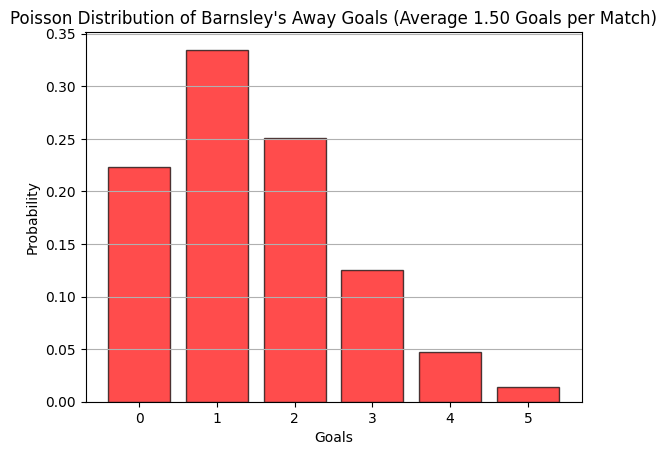

Probability of Barnsley scoring 0 away goals: 0.2231
Probability of Barnsley scoring 1 away goals: 0.3347
Probability of Barnsley scoring 2 away goals: 0.2510
Probability of Barnsley scoring 3 away goals: 0.1255
Probability of Barnsley scoring 4 away goals: 0.0471
Probability of Barnsley scoring 5 away goals: 0.0141


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Filter data for Barnsley's away matches
barnsley_away_data = data[data['AwayTeam'] == 'Barnsley']

# Calculate Barnsley's average away goals
average_barnsley_away_goals = barnsley_away_data['FTAG'].mean()

# Set the range of goals to predict (e.g., from 0 to 5 goals)
goal_range = np.arange(0, 6)

# Calculate the Poisson distribution probabilities for each number of goals
poisson_probs_barnsley_away = poisson.pmf(goal_range, average_barnsley_away_goals)

# Plot the Poisson distribution for Barnsley's away goals
plt.bar(goal_range, poisson_probs_barnsley_away, alpha=0.7, color='red', edgecolor='black')
plt.title(f"Poisson Distribution of Barnsley's Away Goals (Average {average_barnsley_away_goals:.2f} Goals per Match)")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.xticks(goal_range)
plt.grid(axis='y')
plt.show()

# Output the probabilities for each goal count for Barnsley's away games
for goals, prob in zip(goal_range, poisson_probs_barnsley_away):
    print(f"Probability of Barnsley scoring {goals} away goals: {prob:.4f}")


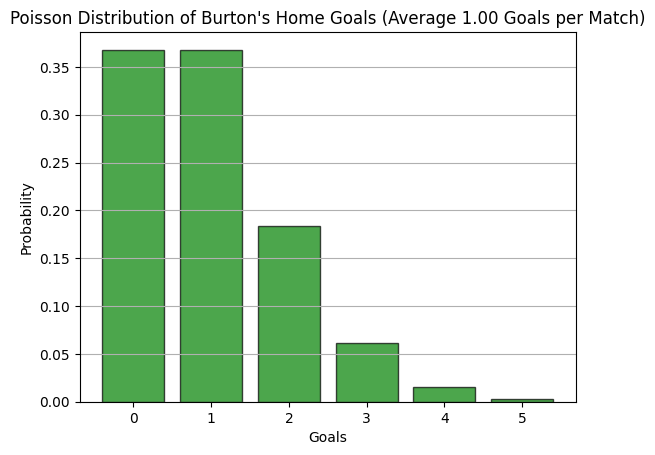

Probability of Burton scoring 0 home goals: 0.3679
Probability of Burton scoring 1 home goals: 0.3679
Probability of Burton scoring 2 home goals: 0.1839
Probability of Burton scoring 3 home goals: 0.0613
Probability of Burton scoring 4 home goals: 0.0153
Probability of Burton scoring 5 home goals: 0.0031


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Filter data for Burton's home matches
burton_home_data = data[data['HomeTeam'] == 'Burton']

# Calculate Burton's average home goals
average_burton_home_goals = burton_home_data['FTHG'].mean()

# Set the range of goals to predict (e.g., from 0 to 5 goals)
goal_range = np.arange(0, 6)

# Calculate the Poisson distribution probabilities for each number of goals
poisson_probs_burton_home = poisson.pmf(goal_range, average_burton_home_goals)

# Plot the Poisson distribution for Burton's home goals
plt.bar(goal_range, poisson_probs_burton_home, alpha=0.7, color='green', edgecolor='black')
plt.title(f"Poisson Distribution of Burton's Home Goals (Average {average_burton_home_goals:.2f} Goals per Match)")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.xticks(goal_range)
plt.grid(axis='y')
plt.show()

# Output the probabilities for each goal count for Burton's home games
for goals, prob in zip(goal_range, poisson_probs_burton_home):
    print(f"Probability of Burton scoring {goals} home goals: {prob:.4f}")


Probability of Wrexham winning: 0.2657
Probability of a draw: 0.3307
Probability of Burton winning: 0.4029


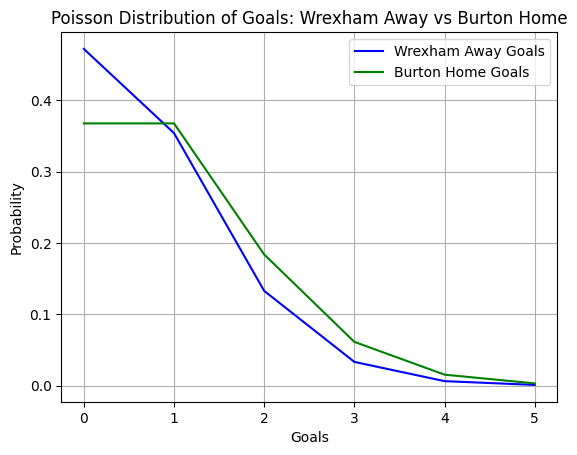

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Set the average goals scored (calculated from previous steps)
# average_wrexham_away_goals = 1.50  # Example value for Wrexham's away goals
# average_burton_home_goals = 1.20  # Example value for Burton's home goals

# Set the range of possible goals (e.g., 0 to 5 goals)
goal_range = np.arange(0, 6)

# Calculate Poisson distributions for both Wrexham away and Burton home goals
wrexham_away_probs = poisson.pmf(goal_range, average_wrexham_away_goals)
burton_home_probs = poisson.pmf(goal_range, average_burton_home_goals)

# Calculate the probabilities of different outcomes (Wrexham Win, Draw, Burton Win)
wrexham_win_prob = 0
draw_prob = 0
burton_win_prob = 0

# Loop through all possible goal combinations
for wrexham_goals in goal_range:
    for burton_goals in goal_range:
        if wrexham_goals > burton_goals:
            wrexham_win_prob += wrexham_away_probs[wrexham_goals] * burton_home_probs[burton_goals]
        elif wrexham_goals == burton_goals:
            draw_prob += wrexham_away_probs[wrexham_goals] * burton_home_probs[burton_goals]
        else:
            burton_win_prob += wrexham_away_probs[wrexham_goals] * burton_home_probs[burton_goals]

# Output the probabilities
print(f"Probability of Wrexham winning: {wrexham_win_prob:.4f}")
print(f"Probability of a draw: {draw_prob:.4f}")
print(f"Probability of Burton winning: {burton_win_prob:.4f}")

# Optional: Plot the Poisson distributions for both teams
plt.plot(goal_range, wrexham_away_probs, label="Wrexham Away Goals", color='blue')
plt.plot(goal_range, burton_home_probs, label="Burton Home Goals", color='green')
plt.title("Poisson Distribution of Goals: Wrexham Away vs Burton Home")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


Probability of Wrexham winning: 0.4678
Probability of Draw: 0.2831
Probability of Burton winning: 0.2490


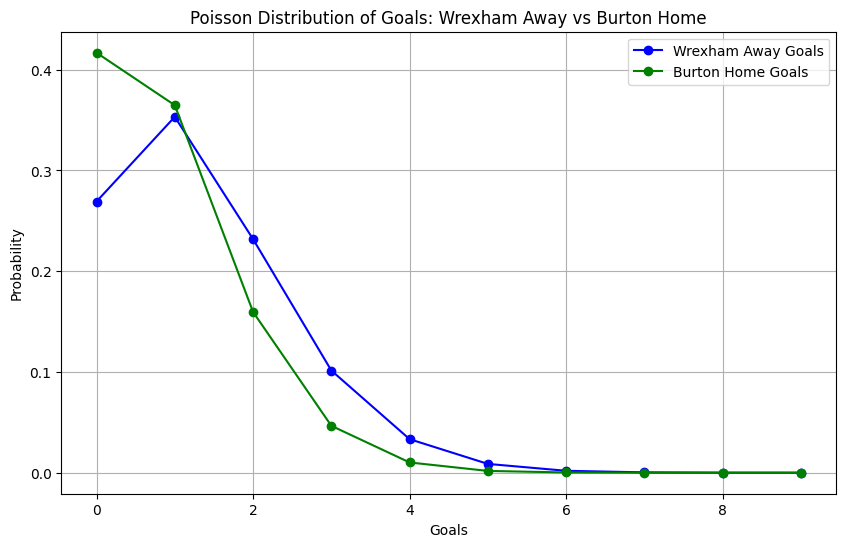

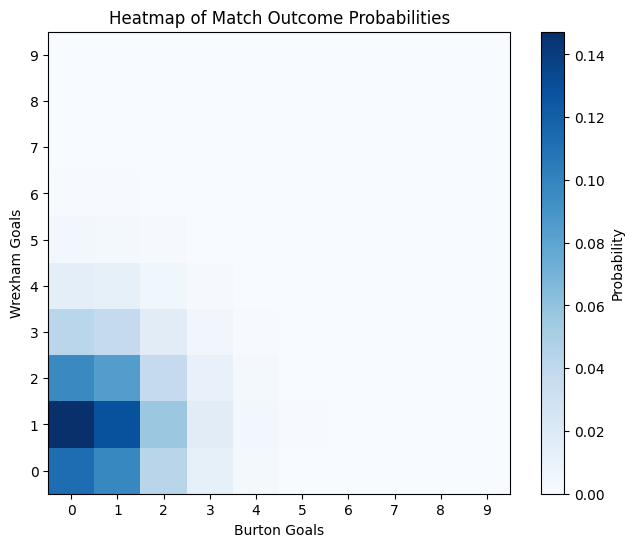

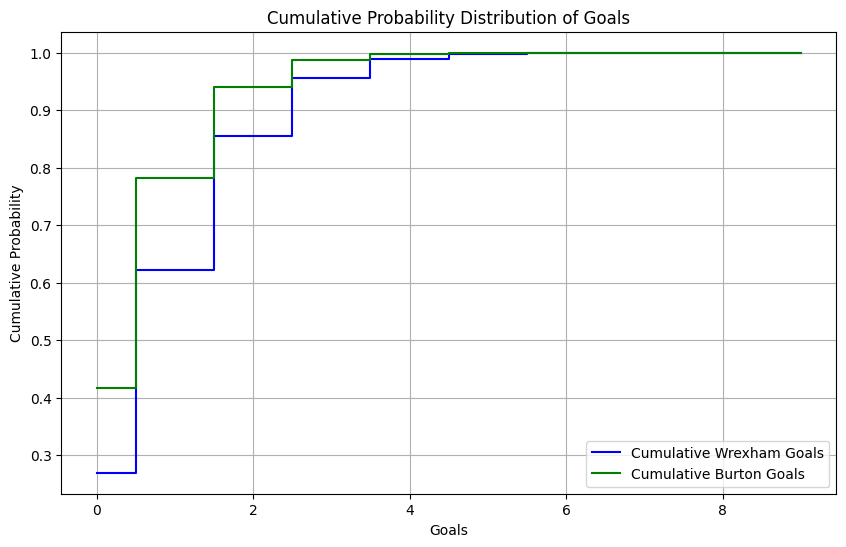

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded and contains the necessary columns:
# 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG'

# Filter data for Wrexham's away matches and Burton's home matches
wrexham_away_data = data[data['AwayTeam'] == 'Wrexham']
burton_home_data = data[data['HomeTeam'] == 'Burton']

# Calculate Wrexham's away goals scored and conceded
wrexham_away_goals_scored = wrexham_away_data['FTAG'].sum()  # Total away goals scored by Wrexham
wrexham_away_goals_conceded = wrexham_away_data['FTHG'].sum()  # Total away goals conceded by Wrexham
wrexham_away_games = len(wrexham_away_data)

# Calculate Burton's home goals scored and conceded
burton_home_goals_scored = burton_home_data['FTHG'].sum()  # Total home goals scored by Burton
burton_home_goals_conceded = burton_home_data['FTAG'].sum()  # Total home goals conceded by Burton
burton_home_games = len(burton_home_data)

# Calculate average goals scored and conceded per match for each team
wrexham_avg_away_goals = wrexham_away_goals_scored / wrexham_away_games
wrexham_avg_away_conceded = wrexham_away_goals_conceded / wrexham_away_games

burton_avg_home_goals = burton_home_goals_scored / burton_home_games
burton_avg_home_conceded = burton_home_goals_conceded / burton_home_games

# Calculate the expected goals for each team
wrexham_expected_goals = wrexham_avg_away_goals * burton_avg_home_conceded
burton_expected_goals = burton_avg_home_goals * wrexham_avg_away_conceded

# Set the range of possible goals (e.g., 0 to 5)
goal_range = np.arange(0, 10)

# Calculate the Poisson distribution for both Wrexham and Burton using their expected goals
wrexham_away_probs = poisson.pmf(goal_range, wrexham_expected_goals)
burton_home_probs = poisson.pmf(goal_range, burton_expected_goals)

# Calculate the probabilities of different outcomes (Wrexham Win, Draw, Burton Win)
wrexham_win_prob = 0
draw_prob = 0
burton_win_prob = 0

outcome_probs = np.zeros((len(goal_range), len(goal_range)))  # For heatmap

for wrexham_goals in goal_range:
    for burton_goals in goal_range:
        prob = wrexham_away_probs[wrexham_goals] * burton_home_probs[burton_goals]
        outcome_probs[wrexham_goals, burton_goals] = prob  # Save for heatmap
        if wrexham_goals > burton_goals:
            wrexham_win_prob += prob
        elif wrexham_goals == burton_goals:
            draw_prob += prob
        else:
            burton_win_prob += prob

# Output the probabilities
print(f"Probability of Wrexham winning: {wrexham_win_prob:.4f}")
print(f"Probability of Draw: {draw_prob:.4f}")
print(f"Probability of Burton winning: {burton_win_prob:.4f}")

# ====== PLOTS ======

# 1. Poisson Distribution for Wrexham and Burton
plt.figure(figsize=(10, 6))
plt.plot(goal_range, wrexham_away_probs, label="Wrexham Away Goals", color='blue', marker='o')
plt.plot(goal_range, burton_home_probs, label="Burton Home Goals", color='green', marker='o')
plt.title("Poisson Distribution of Goals: Wrexham Away vs Burton Home")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# 2. Heatmap of outcome probabilities
plt.figure(figsize=(8, 6))
plt.imshow(outcome_probs, cmap="Blues", origin="lower")
plt.colorbar(label="Probability")
plt.title("Heatmap of Match Outcome Probabilities")
plt.xlabel("Burton Goals")
plt.ylabel("Wrexham Goals")
plt.xticks(ticks=np.arange(len(goal_range)), labels=goal_range)
plt.yticks(ticks=np.arange(len(goal_range)), labels=goal_range)
plt.show()

# 3. Cumulative Probability Distribution for Wrexham and Burton
wrexham_cumulative_probs = np.cumsum(wrexham_away_probs)
burton_cumulative_probs = np.cumsum(burton_home_probs)

plt.figure(figsize=(10, 6))
plt.step(goal_range, wrexham_cumulative_probs, label="Cumulative Wrexham Goals", color='blue', where='mid')
plt.step(goal_range, burton_cumulative_probs, label="Cumulative Burton Goals", color='green', where='mid')
plt.title("Cumulative Probability Distribution of Goals")
plt.xlabel("Goals")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()


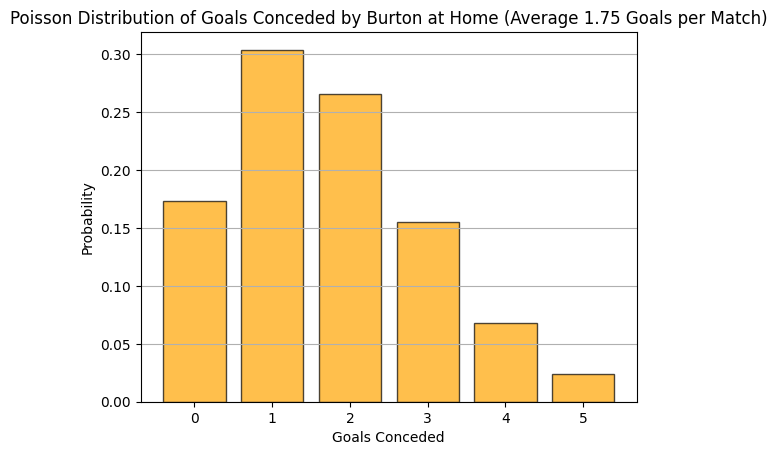

Probability of Burton conceding 0 goals at home: 0.1738
Probability of Burton conceding 1 goals at home: 0.3041
Probability of Burton conceding 2 goals at home: 0.2661
Probability of Burton conceding 3 goals at home: 0.1552
Probability of Burton conceding 4 goals at home: 0.0679
Probability of Burton conceding 5 goals at home: 0.0238


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Assuming 'data' is your DataFrame containing the match results
# Filter data for Burton's home matches
burton_home_data = data[data['HomeTeam'] == 'Burton']

# Calculate Burton's average goals conceded at home
average_burton_home_goals_conceded = burton_home_data['FTAG'].mean()  # FTAG = Away team's goals scored against Burton

# Set the range of goals to predict (e.g., from 0 to 5 goals)
goal_range = np.arange(0, 6)

# Calculate the Poisson distribution probabilities for each number of goals conceded
poisson_probs_burton_home_conceded = poisson.pmf(goal_range, average_burton_home_goals_conceded)

# Plot the Poisson distribution for goals conceded by Burton at home
plt.bar(goal_range, poisson_probs_burton_home_conceded, alpha=0.7, color='orange', edgecolor='black')
plt.title(f"Poisson Distribution of Goals Conceded by Burton at Home (Average {average_burton_home_goals_conceded:.2f} Goals per Match)")
plt.xlabel("Goals Conceded")
plt.ylabel("Probability")
plt.xticks(goal_range)
plt.grid(axis='y')
plt.show()

# Output the probabilities for each goal count for goals conceded by Burton at home
for goals, prob in zip(goal_range, poisson_probs_burton_home_conceded):
    print(f"Probability of Burton conceding {goals} goals at home: {prob:.4f}")
